In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

### Generate a “label” data set. We will use such data sets for classification and prediction. Take window=5 days and for each day compute rolling moving average (call this x) and rolling standard deviation (call this y). For each such day, we compute the vector (x, y, label) as follows:
##### a. this day is assigned (x, y, +) if next day return is positive (or zero)
#### b. this day is assigned (x, y, -) if next day return is negative

In [3]:
win=5

new_df = df.copy()
new_df.rename(columns={'Adj Close': 'Price'}, inplace = True) 
new_df = new_df[['Date', 'Price']]
new_df['pct_change'] = new_df['Price'].pct_change() 
new_df['pct_change_size'] = abs(new_df['pct_change'])
new_df['pct_change_win'] = new_df['Price'].pct_change(win) 
new_df['std'] = new_df['pct_change'].rolling(win).std() 
new_df['pct_tomorrow'] = new_df['pct_change'].shift(1) 
new_df['label'] = new_df['pct_tomorrow'] > 0

In [4]:
new_df


,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
0,2013/9/16,34.026104,NaN,NaN,NaN,NaN,NaN,False
1,2013/9/17,33.885891,-0.004121,0.004121,NaN,NaN,NaN,False
2,2013/9/18,34.876091,0.029222,0.029222,NaN,NaN,-0.004121,False
3,2013/9/19,34.692081,-0.005276,0.005276,NaN,NaN,0.029222,True
4,2013/9/20,34.087433,-0.017429,0.017429,NaN,NaN,-0.005276,False
5,2013/9/23,34.104969,0.000514,0.000514,0.002318,0.017328,-0.017429,False
6,2013/9/24,34.140015,0.001028,0.001028,0.007499,0.017131,0.000514,True
7,2013/9/25,34.135738,-0.000125,0.000125,-0.021228,0.007783,0.001028,True
8,2013/9/26,34.514431,0.011094,0.011094,-0.005121,0.010288,-0.000125,False
9,2013/9/27,34.100506,-0.011993,0.011993,0.000384,0.008188,0.011094,True


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

colors = np.where(new_df['label'] == True , 'g', 'r')
# plotting
new_df.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=new_df['pct_change_size']*500 )
plt.show()

<Figure size 640x480 with 1 Axes>

### linear regression: Predicted label by linear regression of daily returns over the previous 30 days for 2017 data

In [6]:
#Pick one year: 2017 + the last 30 days of 2016
new_df['Date'] = pd.to_datetime(new_df['Date'])
start_date = '11-16-2016'
end_date = '12-31-2017'
mask = (new_df['Date'] > start_date) & (new_df['Date'] <= end_date)
new_df = new_df.loc[mask]

In [7]:
new_df

,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
801,2016-11-17,27.720745,0.014366,0.014366,0.021164,0.007839,-0.003144,False
802,2016-11-18,27.490934,-0.008290,0.008290,0.016283,0.009189,0.014366,True
803,2016-11-21,27.385605,-0.003831,0.003831,0.002805,0.008843,-0.008290,False
804,2016-11-22,27.309002,-0.002797,0.002797,-0.003842,0.008729,-0.003831,False
805,2016-11-23,27.462210,0.005610,0.005610,0.004905,0.009000,-0.002797,False
806,2016-11-25,28.161213,0.025453,0.025453,0.015889,0.013402,0.005610,True
807,2016-11-28,28.036736,-0.004420,0.004420,0.019854,0.012662,0.025453,True
808,2016-11-29,28.161213,0.004440,0.004440,0.028322,0.011900,-0.004420,False
809,2016-11-30,28.477201,0.011221,0.011221,0.042777,0.011029,0.004440,True
810,2016-12-01,28.362297,-0.004035,0.004035,0.032775,0.012410,0.011221,True


#### Visualize the regression line

[[801]
 [802]
 [803]
 [804]
 [805]
 [806]
 [807]
 [808]
 [809]
 [810]
 [811]
 [812]
 [813]
 [814]
 [815]
 [816]
 [817]
 [818]
 [819]
 [820]
 [821]
 [822]
 [823]
 [824]
 [825]
 [826]
 [827]
 [828]
 [829]
 [830]]
[[ 0.01436581]
 [-0.00829022]
 [-0.00383141]
 [-0.0027972 ]
 [ 0.00561016]
 [ 0.02545327]
 [-0.00442016]
 [ 0.00443978]
 [ 0.01122068]
 [-0.00403495]
 [-0.00844029]
 [ 0.00204303]
 [ 0.00271828]
 [ 0.01728214]
 [ 0.00999335]
 [ 0.01022427]
 [-0.01371207]
 [ 0.0029792 ]
 [-0.00957092]
 [ 0.00599793]
 [-0.00198744]
 [ 0.00232321]
 [-0.00132442]
 [-0.00464193]
 [ 0.00499668]
 [ 0.0013258 ]
 [-0.00389246]
 [-0.01037483]
 [-0.00980727]
 [-0.00307373]]


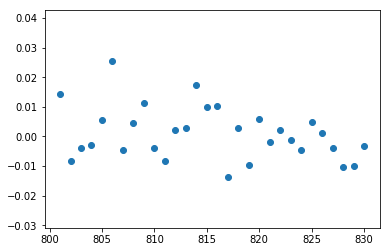

In [8]:
xs = range(801,831)
ys = []
for i in range(30):
    y = new_df.loc[801+i]['pct_change']
    ys.append(y)

xs = np.array(xs)[:,np.newaxis]
ys = np.array(ys)[:,np.newaxis]

print(xs)
print(ys)

plt.scatter(xs, ys)

[[-0.00394077]]
[[ 5.67196764e-03]
 [ 5.35154304e-03]
 [ 5.03111843e-03]
 [ 4.71069383e-03]
 [ 4.39026922e-03]
 [ 4.06984462e-03]
 [ 3.74942001e-03]
 [ 3.42899540e-03]
 [ 3.10857080e-03]
 [ 2.78814619e-03]
 [ 2.46772159e-03]
 [ 2.14729698e-03]
 [ 1.82687238e-03]
 [ 1.50644777e-03]
 [ 1.18602317e-03]
 [ 8.65598560e-04]
 [ 5.45173955e-04]
 [ 2.24749349e-04]
 [-9.56752560e-05]
 [-4.16099861e-04]
 [-7.36524467e-04]
 [-1.05694907e-03]
 [-1.37737368e-03]
 [-1.69779828e-03]
 [-2.01822289e-03]
 [-2.33864749e-03]
 [-2.65907210e-03]
 [-2.97949671e-03]
 [-3.29992131e-03]
 [-3.62034592e-03]]


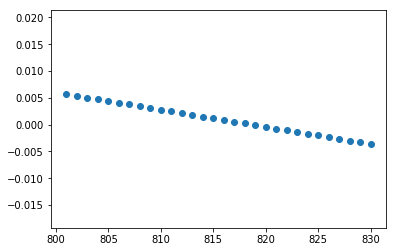

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(xs, ys)


# Train the model using the training sets


# Let's see prediction
predicted_y = model.predict([[831]])
print(predicted_y)


# Let's see predictions
predicted_ys = model.predict(xs)
print(predicted_ys)

plt.scatter(xs, predicted_ys)

#### predict labels by regression line

In [10]:
def getPredictedLabel(df,today_row):
    start = today_row-30
    end = today_row
    
    xs = range(start,end)
    ys = []
    for i in range(30):
        y = new_df.loc[start+i]['pct_change']
        ys.append(y)

    xs = np.array(xs)[:,np.newaxis]
    ys = np.array(ys)[:,np.newaxis]
    
    model = LinearRegression(fit_intercept=True)
    model.fit(xs, ys)

    predicted_y = model.predict([[today_row]])
    
    predicted_label = True if predicted_y >=0 else False

    return predicted_label
    

In [11]:
# 831 = first day in 2017
# 1082 = last day in 2017

predicted_labels = []
for row in range(831, 1082):
    predicted_label = getPredictedLabel(new_df,row)
    predicted_labels.append(predicted_label)

    
predicted_labels 
len(predicted_labels)

251

### compute misclassification for linear regression method

In [12]:
#Pick only 2017 data 
df_2017 = new_df.copy()
df_2017['Date'] = pd.to_datetime(df_2017['Date'])
start_date = '01-01-2017'
end_date = '12-31-2017'
mask = (df_2017['Date'] > start_date) & (df_2017['Date'] <= end_date)
df_2017 = df_2017.loc[mask]

labels = list(df_2017.loc[: , "label"])
#labels

In [13]:
def getMisClassificationRatio(actual, predict):
    error_count = 0 
    for i in range(len(actual)):
        if actual[i]!=predict[i]:
            error_count+=1
    error_rate = error_count/len(actual)
    return error_rate

In [14]:
error_rate = round(getMisClassificationRatio(labels, predicted_labels),2)
print("linear regression method's mis-classification ratio=",error_rate)

linear regression method's mis-classification ratio= 0.42
